In [1]:
import pandas as pd
dataset = pd.read_csv("heights_weights_gender.csv")

In [2]:
dataset.info()
dataset.describe()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
dataset['Gender'].replace('Female', 0, inplace= True)
dataset['Gender'].replace('Male', 1, inplace= True)
X = dataset.iloc[: ,: -1].values
y = dataset.iloc[: , 2].values


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [12]:
lin_pred = lin_reg.predict(X_test)
lin_pred


array([141.93828842, 176.55658781, 219.77836195, ..., 149.97129636,
       166.83374903, 138.87940678])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Absolute Error", mean_absolute_error(y_test, lin_pred))
print("Mean Squared Error", mean_squared_error(y_test, lin_pred))

Mean Absolute Error 7.955916525326745
Mean Squared Error 97.87152220196167


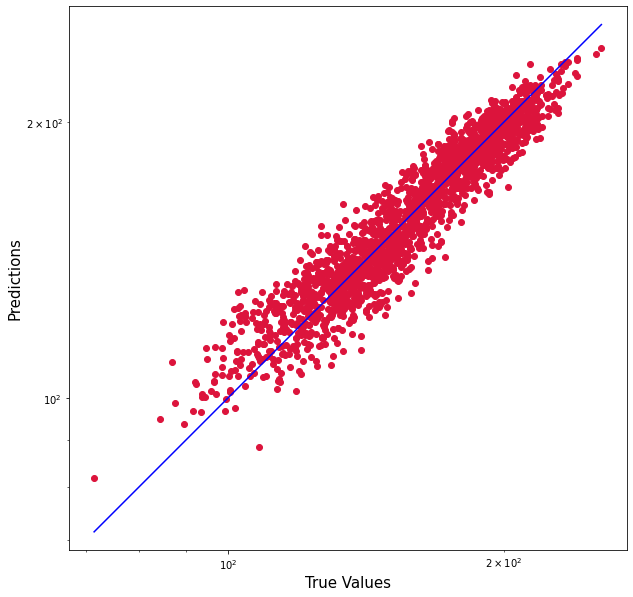

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test, lin_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(lin_pred), max(y_test))
p2 = min(min(lin_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()